In [39]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

In [58]:
from pymutspec.annotation import rev_comp, transcriptor
from pymutspec.draw import plot_mutspec12, plot_mutspec192
from scipy.spatial.distance import pdist, squareform

In [40]:
mut_total = pd.read_csv('./data/missense_mutations.csv')

print(mut_total.groupby(['dataset', 'assembly']).chr.count().unstack())

assembly  GRCh37  GRCh38
dataset                 
WES       390983  377919
WGS       138615    2985


In [41]:
mut_total

,disease,sample,cohort,assembly,snp/indel,chr,start,end,ref,var,annotations,dataset,aa_change,cdn_change,strand
0,ALL,SJTALL001,doi:10.1038/nature10725,GRCh37,SNP,10,106160610,106160610,G,A,SOMATIC:Whole exome; dbSNP v147,WES,R/H,cGc/cAc,1
1,ALL,SJTALL001,doi:10.1038/nature10725,GRCh37,SNP,10,59986857,59986857,C,T,SOMATIC:Whole exome,WES,R/Q,cGa/cAa,-1
2,ALL,SJTALL001,doi:10.1038/nature10725,GRCh37,SNP,1,115256528,115256528,T,G,SOMATIC:Whole exome; dbSNP v147,WES,Q/H,caA/caC,-1
3,Lymph-BNHL,PD4301d,doi:10.1038/nature12477,GRCh37,SNP,1,115256528,115256528,T,G,SOMATIC:Whole exome; dbSNP v147,WES,Q/H,caA/caC,-1
4,ALL,SJTALL001,doi:10.1038/nature10725,GRCh37,SNP,13,39430295,39430295,G,A,SOMATIC:Whole exome,WES,V/M,Gtg/Atg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910497,Sarcoma,PD7530a,PMID:24633157,GRCh38,SNP,15,74722881,74722881,G,A,WGS:SOMATIC; dbSNP v147,WGS,V/L,Gtg/Ttg,-1
910498,Sarcoma,PD7530a,PMID:24633157,GRCh38,SNP,19,37888313,37888313,G,A,WGS:SOMATIC,WGS,K/N,aaG/aaT,-1
910499,Sarcoma,PD7530a,PMID:24633157,GRCh38,SNP,5,141183577,141183577,G,A,WGS:SOMATIC; dbSNP v147; 1000 genomes,WGS,V/M,Gtg/Atg,1
910500,Sarcoma,PD7530a,PMID:24633157,GRCh38,SNP,6,137206286,137206286,G,A,WGS:SOMATIC,WGS,D/Y,Gat/Tat,-1


In [51]:
available_cancers = mut_total[mut_total.dataset == 'WES']['disease'].value_counts()
available_cancers[available_cancers>1000].shape

(40,)

## Spectra

In [47]:
spectra_wes192 = pd.read_csv(
    './data/Input_Data_PCAWG7_23K_Spectra_DB/Mutation_Catalogs_--_Spectra_of_Individual_Tumours/WES_Other.192.csv')
spectra_wes192['Mut'] = spectra_wes192.apply(
    lambda x: x.Trinucleotide[0] + '[' + x['Mutation type'] + ']' + x.Trinucleotide[-1], axis=1)
spectra_wes192.loc[spectra_wes192.Strand == 'T', 'Mut'] = spectra_wes192[spectra_wes192.Strand == 'T'].Mut.apply(rev_comp)
spectra_wes192.loc[spectra_wes192.Strand == 'T', 'Mutation type'] = \
    spectra_wes192.loc[spectra_wes192.Strand == 'T', 'Mutation type'].str.translate(transcriptor)
spectra_wes192

,Strand,Mutation type,Trinucleotide,ALL::TARGET-10-PAIXPH-03A-01D,ALL::TARGET-10-PAKHZT-03A-01R,ALL::TARGET-10-PAKMVD-09A-01D,ALL::TARGET-10-PAKSWW-03A-01D,ALL::TARGET-10-PALETF-03A-01D,ALL::TARGET-10-PALLSD-09A-01D,ALL::TARGET-10-PAMDKS-03A-01D,...,Head-SCC::V-112,Head-SCC::V-116,Head-SCC::V-119,Head-SCC::V-123,Head-SCC::V-124,Head-SCC::V-125,Head-SCC::V-14,Head-SCC::V-29,Head-SCC::V-98,Mut
0,T,A>C,TTT,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A[A>C]A
1,T,A>C,GTT,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A[A>C]C
2,T,A>C,CTT,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A[A>C]G
3,T,A>C,ATT,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A[A>C]T
4,T,A>C,TTG,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C[A>C]A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,U,T>G,GTT,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,G[T>G]T
188,U,T>G,TTA,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,T[T>G]A
189,U,T>G,TTC,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T[T>G]C
190,U,T>G,TTG,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T[T>G]G


In [49]:
import json
with open('data/human_cds_nuc_cnt.json') as f:
    nuc_cnt = json.load(f)

In [52]:
spectra_wes12 = spectra_wes192.groupby('Mutation type')\
    .sum().reset_index().rename(columns={'Mutation type': 'Mut'})
wes_exp12 = spectra_wes12.Mut.apply(lambda x: nuc_cnt[x[0]])
wes_exp12.index = spectra_wes12.Mut
wes_exp12 /= wes_exp12.sum() / 3
spectra_wes12 = (spectra_wes12.set_index('Mut').T / wes_exp12.to_dict()).T
spectra_wes12 = spectra_wes12 / spectra_wes12.sum()
spectra_wes12

,ALL::TARGET-10-PAIXPH-03A-01D,ALL::TARGET-10-PAKHZT-03A-01R,ALL::TARGET-10-PAKMVD-09A-01D,ALL::TARGET-10-PAKSWW-03A-01D,ALL::TARGET-10-PALETF-03A-01D,ALL::TARGET-10-PALLSD-09A-01D,ALL::TARGET-10-PAMDKS-03A-01D,ALL::TARGET-10-PAPJIB-04A-01D,ALL::TARGET-10-PAPLDL-03A-01D,ALL::TARGET-10-PAPSPG-04A-01D,...,Head-SCC::V-109,Head-SCC::V-112,Head-SCC::V-116,Head-SCC::V-119,Head-SCC::V-123,Head-SCC::V-124,Head-SCC::V-125,Head-SCC::V-14,Head-SCC::V-29,Head-SCC::V-98
Mut,,,,,,,,,,,,,,,,,,,,,
A>C,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.030204,...,0.000000,0.005633,0.004593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A>G,0.489872,0.0,1.0,0.105174,0.000000,1.0,1.0,0.029926,0.000000,0.030204,...,0.016145,0.011266,0.009186,0.007616,0.000000,0.000000,0.033920,0.000000,0.240436,0.000000
A>T,0.000000,0.0,0.0,0.105174,0.000000,0.0,0.0,0.029926,0.020058,0.000000,...,0.032291,0.011266,0.018372,0.022847,0.007253,0.020890,0.033920,0.000000,0.000000,0.000000
C>A,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.031688,0.000000,0.000000,...,0.085480,0.005964,0.038908,0.016128,0.046078,0.044241,0.017958,0.317611,0.254593,0.000000
C>G,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.031688,0.000000,0.000000,...,0.085480,0.000000,0.155630,0.000000,0.107515,0.110602,0.071834,0.000000,0.000000,0.000000
C>T,0.000000,0.0,0.0,0.222733,0.463654,0.0,0.0,0.253504,0.488492,0.319820,...,0.256440,0.465223,0.282080,0.499971,0.345582,0.243323,0.305293,0.158806,0.254593,0.565749
G>A,0.510128,0.0,0.0,0.328569,0.000000,0.0,0.0,0.498614,0.417744,0.345978,...,0.353072,0.463387,0.286976,0.428249,0.279441,0.304558,0.317900,0.156177,0.000000,0.420680
G>C,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.062327,0.000000,0.062905,...,0.067252,0.005866,0.124356,0.007931,0.128392,0.152279,0.017661,0.000000,0.000000,0.000000
G>T,0.000000,0.0,0.0,0.109523,0.000000,0.0,0.0,0.062327,0.000000,0.062905,...,0.084065,0.017597,0.057395,0.007931,0.067972,0.021754,0.035322,0.000000,0.250378,0.013570


In [167]:
for cancer in available_cancers[available_cancers>1000].index:
    cur_samples = [x for x in spectra_wes12.columns if x.startswith(cancer)]
    if len(cur_samples) < 50:
        continue
    cur_spectra = spectra_wes12[cur_samples].T
    cur_spectra = cur_spectra[(cur_spectra > 0).sum(1) >= 4]
    cossim = 1 - squareform(pdist(cur_spectra, 'cosine'))
    cur_spectra = cur_spectra[(cossim < 0.7).sum(1) < len(cur_spectra) / 5]
    if len(cur_spectra) < 15:
        continue
    mean_cossim = np.mean(1-pdist(cur_spectra, 'cosine'))
    median_cossim = np.median(1-pdist(cur_spectra, 'cosine'))
    print(f"{cancer[:10]}\t{len(cur_samples)}\t{len(cur_spectra)}\t{mean_cossim:.2f}\t{median_cossim:.2f}")
    

ColoRect-A	616	496	0.92	0.93
Skin-BCC	129	126	0.99	1.00
Skin-Melan	376	223	0.94	0.98
Lung-Adeno	333	34	0.92	0.93
Head-SCC	277	29	0.91	0.91
Eso-SCC	599	561	0.89	0.90
Liver-HCC	572	399	0.89	0.90
Biliary-Ad	357	283	0.88	0.89
Eso-AdenoC	180	163	0.91	0.93
Panc-Adeno	505	270	0.90	0.91
Oral-SCC	126	57	0.92	0.93
AML	390	129	0.92	0.92
Lung-Small	70	66	0.92	0.94
Lung-SCC	126	91	0.92	0.94
Lymph-BNHL	674	31	0.94	0.94
Bladder-TC	145	116	0.88	0.89
Breast-can	223	60	0.88	0.88
Prost-Aden	203	171	0.86	0.87
Kidney-RCC	258	68	0.87	0.88
Ewings	178	100	0.91	0.93
Stomach-Ad	91	75	0.88	0.89
Sarcoma	245	91	0.88	0.89
CNS-GBM	172	53	0.90	0.91
Sarcoma-bo	110	63	0.85	0.86


In [172]:
cur_spectra.mean().rename('MutSpec').sum()

1.0000000000000002

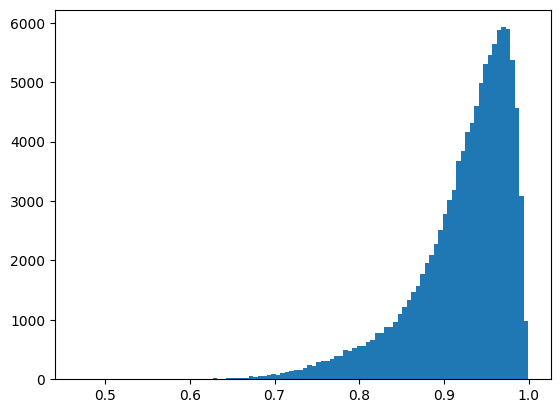

In [148]:
plt.hist(1-pdist(cur_spectra, 'cosine'), 100);

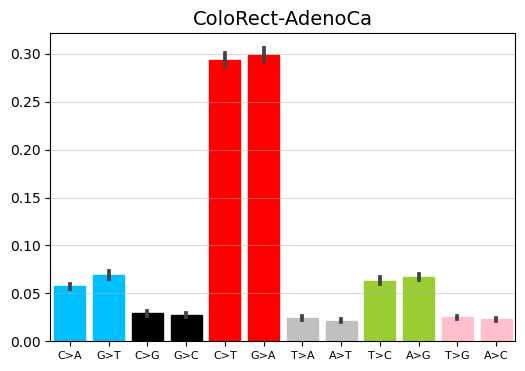

<Axes: title={'center': 'ColoRect-AdenoCa'}>

In [149]:
plot_mutspec12(cur_spectra.melt(value_name='MutSpec', ignore_index=False), title=cancer)

In [151]:
cossim = 1 - squareform(pdist(cur_spectra, 'cosine'))
# plt.hist((cossim < 0.5).sum(1))
(cossim < 0.7).sum(1)

array([ 1,  2,  0,  1,  2,  0,  1,  1,  0,  0,  0,  0,  1,  4,  0,  0, 15,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  3,  2,  0,  0,  2,  0,  0,  0,
        0,  1,  0,  8,  0,  0,  1,  9,  0,  0,  0,  9,  4,  0,  6,  0,  0,
       10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 48,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0, 17,  0,
        0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  6,  4,  4,  0,  0,  0,  3,  0,  2,  1,  0,
        1, 13, 35,  4,  1, 13,  0,  5,  0, 16,  0,  0,  1,  0,  0,  0,  0,
        2,  8,  2,  1,  1,  0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  0,  1,
        1,  5,  0,  0,  0,  0,  0,  1,  0,  7,  4,  3,  2,  0,  0,  0,  0,
        4,  0,  5,  0,  1,  0,  1,  2,  2,  8,  0,  0,  3,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  4,  1,  1,  5,  6,  2,  0, 36,  0,  1,  0,
       21,  0,  0,  0,  0,  0,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  2

In [96]:
from sklearn.decomposition import PCA

X = cur_spectra

# Perform PCA on total_freqs_obs
pca = PCA(n_components=2)
transformed_obs = pca.fit_transform(X)

# Create a DataFrame for the transformed data
transformed_obs_df = pd.DataFrame(
    transformed_obs, columns=['PC1', 'PC2'], index=X.index
)
transformed_obs_df

,PC1,PC2
ColoRect-AdenoCa::C13,0.020099,0.051170
ColoRect-AdenoCa::587358,-0.092088,0.083051
ColoRect-AdenoCa::C10,-0.110388,-0.005210
ColoRect-AdenoCa::C14,-0.108143,0.001983
ColoRect-AdenoCa::C18,0.096891,-0.099971
...,...,...
ColoRect-AdenoCa::CLN2,-0.015288,0.109817
ColoRect-AdenoCa::CLN3,0.199469,0.146467
ColoRect-AdenoCa::CLN4,0.202078,0.200497
ColoRect-AdenoCa::CR007,-0.021305,0.033802


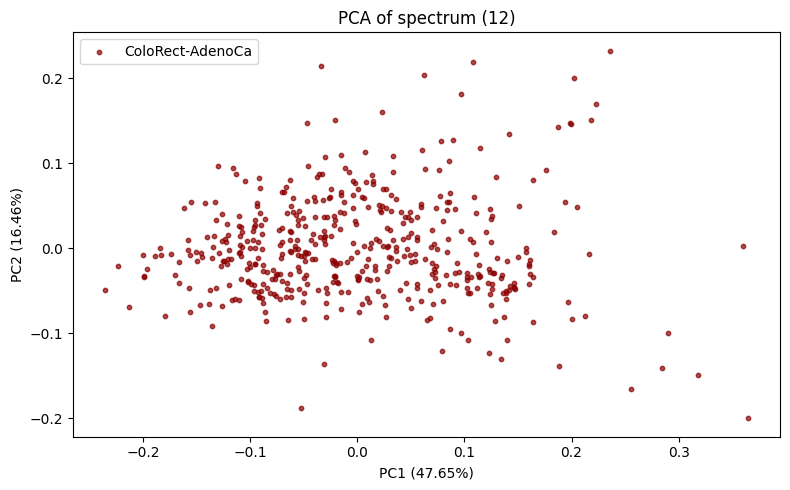

In [97]:
# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_ * 100

# Create scatterplot with labels
plt.figure(figsize=(8, 5))
plt.scatter(transformed_obs_df['PC1'], transformed_obs_df['PC2'], 
    s=10, alpha=0.7, label=cancer, color='darkred')

# Add axis labels with explained variance
plt.title('PCA of spectrum (12)')
plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

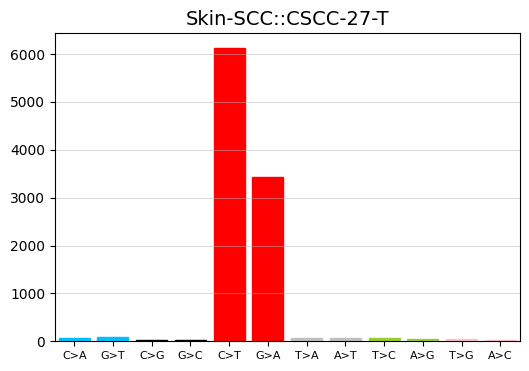

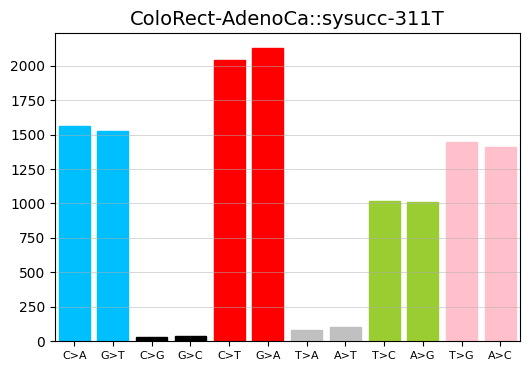

<Axes: title={'center': 'ColoRect-AdenoCa::sysucc-311T'}>

In [ ]:
cur_sample = 'Skin-SCC::CSCC-27-T'
plot_mutspec12(spectra_wes12, spectra_col=cur_sample, title=cur_sample)
cur_sample = 'ColoRect-AdenoCa::sysucc-311T'
plot_mutspec12(spectra_wes12, spectra_col=cur_sample, title=cur_sample)

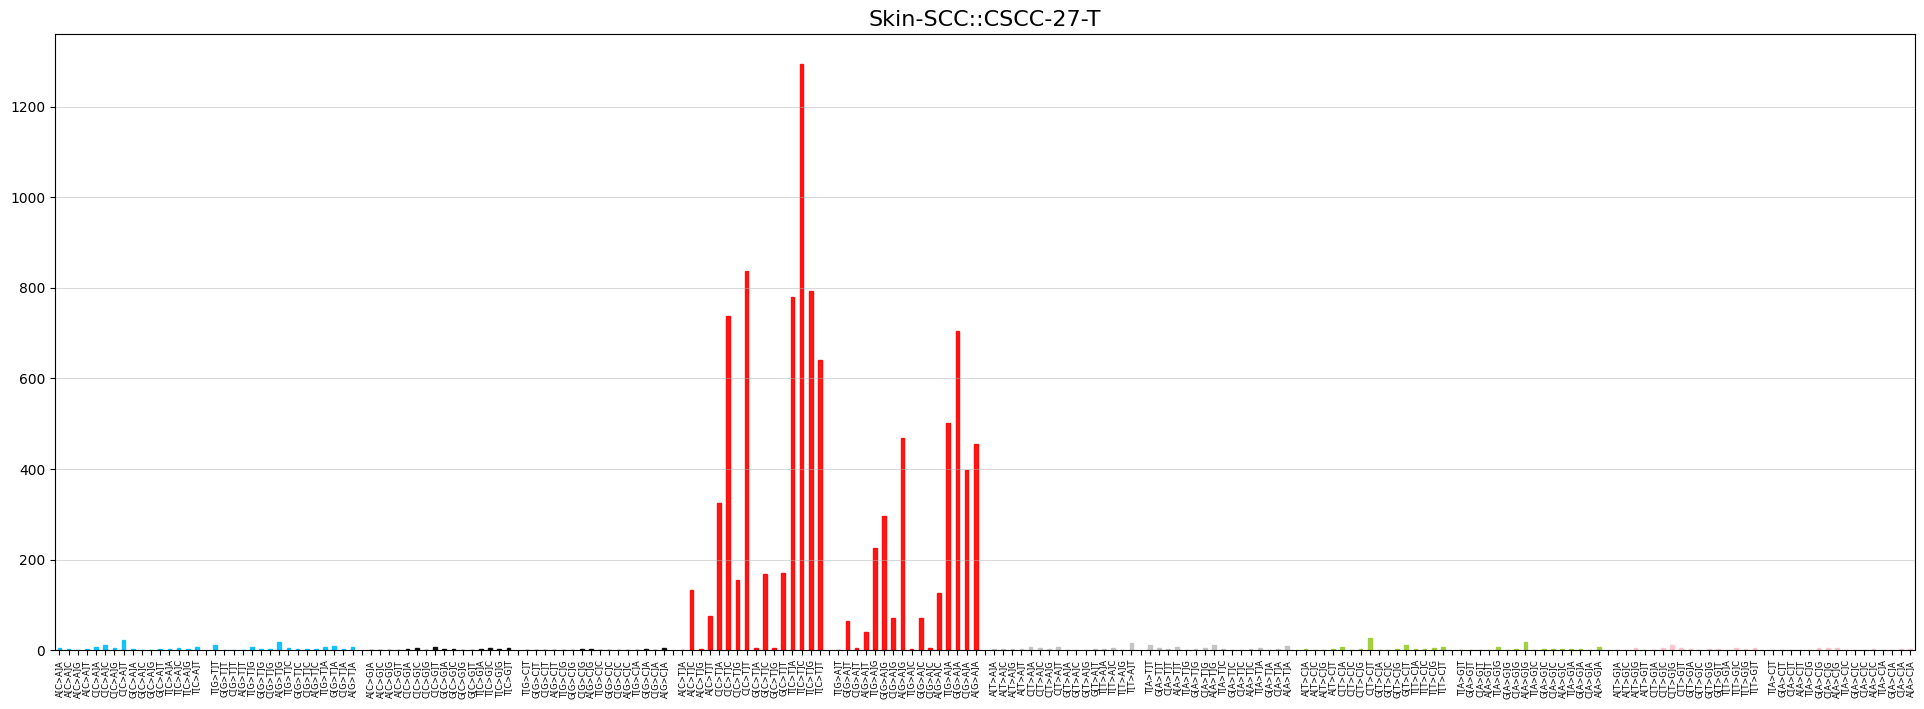

<Axes: title={'center': 'Skin-SCC::CSCC-27-T'}>

In [44]:
cur_sample = 'Skin-SCC::CSCC-27-T'
plot_mutspec192(spectra_wes192, spectra_col=cur_sample, title=cur_sample)

## Plot metrics

### samples

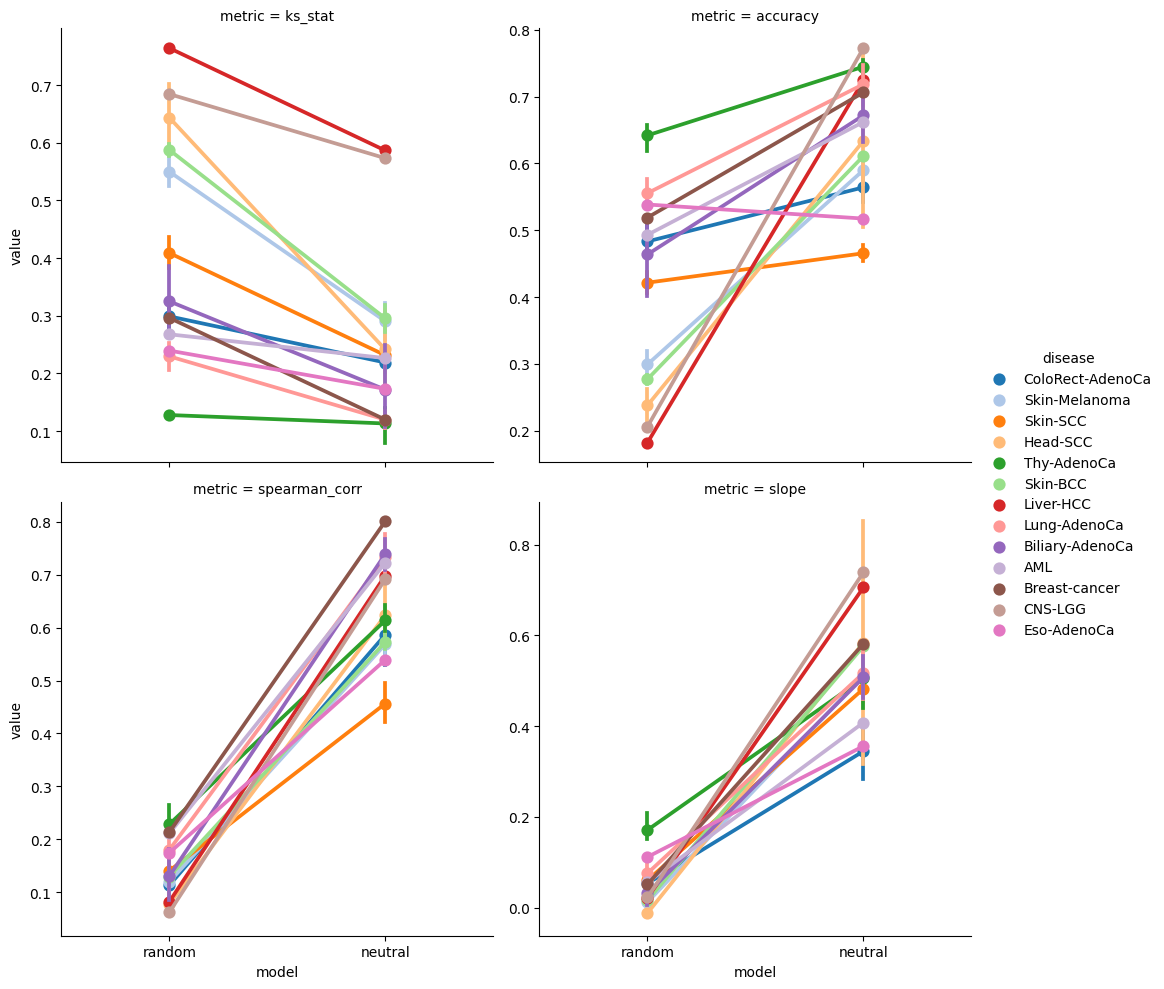

In [199]:
df_met = pd.read_csv('./data/nuclear_somatic_fit_metrics.csv')

sns.catplot(df_met.melt(['disease', 'model'], 
                        ['ks_stat', 'accuracy', 'spearman_corr', 'slope'], var_name='metric'), 
            hue='disease', y='value', x='model', col='metric', sharey=False, col_wrap=2,
            kind='point', order=['random', 'neutral'], palette='tab20')

### cancers

In [196]:
df_met = pd.read_csv('./data/nuclear_somatic_fit_metrics_cancers.csv')

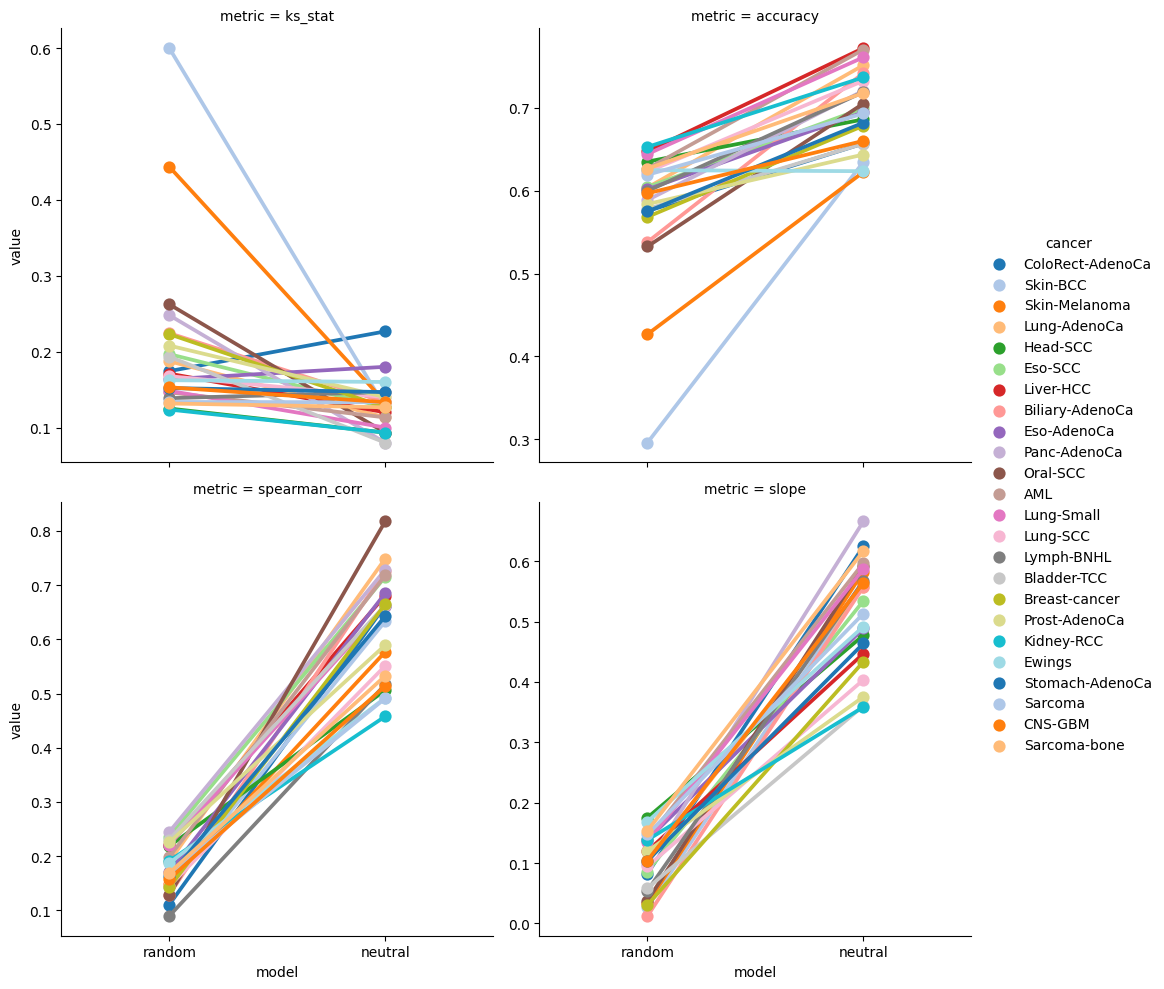

In [197]:
sns.catplot(df_met.melt(['cancer', 'model'], 
                        ['ks_stat', 'accuracy', 'spearman_corr', 'slope'], var_name='metric'), 
            hue='cancer', y='value', x='model', col='metric', sharey=False, col_wrap=2,
            kind='point', order=['random', 'neutral'], palette='tab20')

In [194]:
df_met

,cancer,model,slope,intercept,ks_stat,ks_p,log_likelihood,rmse,spearman_corr,spearman_p,pearson_corr,pearson_p,kl_divergence,accuracy,f1_macro,f1_weighted,mut_count
0,ColoRect-AdenoCa,neutral,0.624849,0.002501,0.226667,8.634330e-04,-5.91048,0.007375,0.662317,2.715590e-20,0.545107,5.511000e-13,0.343722,0.657007,0.660108,0.668495,121777
1,ColoRect-AdenoCa,random,0.082565,0.006116,0.174333,6.737760e-02,-6.34179,0.008254,0.110639,3.134430e-01,0.120057,3.551120e-01,0.773982,0.575459,0.557225,0.571912,121777
2,Skin-BCC,neutral,0.562193,0.002919,0.126667,1.803950e-01,-4.83645,0.012769,0.633245,3.466440e-18,0.714033,1.107730e-24,0.404704,0.634726,0.685595,0.672690,121718
3,Skin-BCC,random,0.026672,0.006489,0.600000,3.487620e-17,-6.15582,0.018393,0.144040,2.582410e-01,0.088395,2.723810e-01,1.710640,0.295895,0.365549,0.294122,121718
4,Skin-Melanoma,neutral,0.583045,0.002780,0.133333,1.390620e-01,-5.53062,0.010353,0.576890,1.107120e-14,0.631966,4.240960e-18,0.498409,0.622538,0.668493,0.628883,67324
5,Skin-Melanoma,random,0.033131,0.006446,0.443667,2.143820e-07,-6.17057,0.013036,0.148911,1.240650e-01,0.088632,2.544090e-01,1.133580,0.426771,0.474246,0.422771,67324
6,Lung-AdenoCa,neutral,0.557849,0.002948,0.113333,2.910740e-01,-5.84053,0.005108,0.748756,3.225370e-28,0.639121,1.356450e-18,0.196720,0.751503,0.733505,0.746932,4025
7,Lung-AdenoCa,random,0.104607,0.005969,0.187333,3.280330e-02,-6.22768,0.007404,0.190109,9.883190e-02,0.141346,1.906700e-01,0.581642,0.603856,0.594007,0.594816,4025
8,Head-SCC,neutral,0.477440,0.003484,0.093333,5.321870e-01,-6.05035,0.005902,0.506011,3.964940e-11,0.444527,1.207500e-08,0.353734,0.686138,0.654517,0.675002,3911
9,Head-SCC,random,0.175276,0.005498,0.125000,2.838880e-01,-6.28555,0.006572,0.218629,1.628030e-01,0.192269,1.861480e-01,0.588278,0.635093,0.596240,0.626639,3911
